In [ ]:
#  ChatGPT Jan 9 [2023]  Version.  

### Prompt:  
Can you write code using scikit-learn that will load in the popper penguins dataset as X and Y and then find linear regression coefficents for the indicator variables for species identity against the four-dimensional X?

### Reply:  
Yes, here is an example of how you can load in the popper penguins dataset using scikit-learn, and then use the LinearRegression class from scikit-learn to find linear regression coefficients for the indicator variables for species identity against the four-dimensional X:

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load in the dataset
data = pd.read_csv("popper_penguins.csv")

# Extract the X and Y variables
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
Y = data['species']

# One-hot encode the species variable
encoder = OneHotEncoder()
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, Y_encoded)

# Print the coefficients
print(reg.coef_)

KeyError: "None of [Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')] are in the [columns]"

Keep in mind that the above example assumes that the dataset is in a file called "popper_penguins.csv" and that it has the columns: 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' and 'species'.


In [7]:
### WT:  Thanks, chatgpt.  Let's get your code to run.


In [ ]:
# Load the penguins dataset from vega-datasets on github: 
import urllib.request

req = urllib.request.Request('https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json')
with urllib.request.urlopen(req) as response:
   data = response.read().decode("utf8")

In [14]:
data_df = pd.read_json(data)

In [17]:
# output the data into a file 
data_df.to_csv("popper_penguins.csv")

In [ ]:
# The first time I run this sample code I get the error

KeyError: "None of [Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')] are in the [columns]"

Which just means I need to find the right labels for the columns.  No problem, let's look.

In [20]:
data_df.columns

Index(['Species', 'Island', 'Beak Length (mm)', 'Beak Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [21]:
# relevant bit of above code:
X = data[['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
Y = data['Species']

# One-hot encode the species variable
encoder = OneHotEncoder()
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, Y_encoded)

# Print the coefficients
print(reg.coef_)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [22]:
# Cool, I can deal with this.

In [24]:
data.isnull().any()

Unnamed: 0             False
Species                False
Island                 False
Beak Length (mm)        True
Beak Depth (mm)         True
Flipper Length (mm)     True
Body Mass (g)           True
Sex                     True
dtype: bool

In [25]:
len(data)

344

In [27]:
import numpy as np
penguinclean = data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])]

In [28]:
len(penguinclean)

342

In [30]:
# Cripes, only two penguins spoiled the whole batch?
data = penguinclean.copy()

In [31]:
# Let us try again
# relevant bit of above code:
X = data[['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
Y = data['Species']

# One-hot encode the species variable
encoder = OneHotEncoder()
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, Y_encoded)

# Print the coefficients
print(reg.coef_)


ValueError: setting an array element with a sequence.

In [32]:
# Well, this is a little harder to diagnose.
# The error comes from
# ---> 14 reg.fit(X, Y_encoded) 
# so I should examine the data types of X and Y_encoded.

In [35]:
X.head(2)

,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0


In [37]:
Y_encoded

<342x3 sparse matrix of type '<class 'numpy.float64'>'
	with 342 stored elements in Compressed Sparse Row format>

In [38]:
# X is a dataframe, and Y_encoded is somme datatype 
# called sparse matrix that I don't understand 

# LinearRegression().fit() is going to have indigestion 
# if X is a dataframe.

# So let us sanitize the data type of X:

In [39]:
X = data[['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']].values
Y = data['Species']

# One-hot encode the species variable
encoder = OneHotEncoder()
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, Y_encoded)

# Print the coefficients
print(reg.coef_)

ValueError: setting an array element with a sequence.

In [42]:
type(X), type(Y_encoded)

(numpy.ndarray, scipy.sparse.csr.csr_matrix)

In [43]:
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [44]:
# Now it looks like Y_encoded is not in the right data type, so let's 
# try to fix that.

In [46]:
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))
type(Y_encoded), type(Y.values)

(scipy.sparse.csr.csr_matrix, numpy.ndarray)

In [48]:
# Wait, Y.values.reshape(-1,1) ??
Y.values.reshape(-1,1).shape

(342, 1)

In [49]:
# What shape is Y?
Y.shape

(342,)

In [52]:
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, Y_encoded)

# Print the coefficients
print(reg.coef_)

ValueError: setting an array element with a sequence.

In [62]:
# Hmm. Google TypeError: float() argument must be a string or a number, not 'csr_matrix' and get 
# https://stackoverflow.com/questions/51693016/typeerror-float-argument-must-be-a-string-or-a-number-not-csr-matrix-when
# which says that 
# "One of the arguments in your function call is a sparse matrix, when it should be a number." 
# Getting warmer...
# Y_encoded came from encoder.fit_transform()... 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html 
# I can turn off sparse output with sparse_output = False
# and for not the most recent version the argument is sparse=False, and it must be 
# applied to the function that creates an instance of OneHotEncoder... 

In [61]:
encoder = OneHotEncoder(sparse=False)

Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, Y_encoded)

# Print the coefficients
print(reg.coef_)

[[-0.07044655  0.09171854 -0.00586776  0.00013661]
 [ 0.07227276  0.02881777 -0.00448241 -0.00033616]
 [-0.00182621 -0.12053631  0.01035017  0.00019955]]


In [64]:
# Hm... A 3 x 4 matrix... 3 species x 4 features... this is the right kind of thing.
# ChatGPT, can you plot this?

### Prompt2: 
How would I plot the decision boundaries between the classes implied by the regression coefficients on top of the scatter plot in python ?


### Response2: 
To plot the decision boundaries between the classes implied by the linear regression coefficients on top of a scatter plot, you will need to create a grid of points for the x and y coordinates, evaluate the linear regression model for each point in the grid, and then use the output to color the points according to which class they belong to.

Here is an example of how you can create a scatter plot with decision boundaries for a 2-dimensional dataset:
    

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: Species, Length: 342, dtype: object

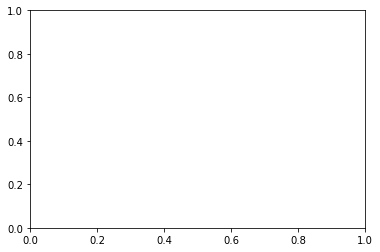

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a scatter plot of the data
plt.scatter(X[:,0], X[:,1], c=Y, cmap='rainbow')

# Create a grid of points for the x and y coordinates
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Evaluate the linear regression model for each point in the grid
Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries on top of the scatter plot
plt.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [67]:
# No, you can't.